# Árbol de decisión
- A01173359 - Mario Emilio Jiménez Vizcaíno
- A01656159 - Juan Sebastián Rodríguez Galarza
- A01656257 - Kevin Torres Martínez

Queremos predecir la calidad del vino rojo en base a 6 variables independientes no lineales, por lo que el árbol de decisión es el algoritmo más indicado para esta situación porque nuestro conjunto de datos de entrada está etiquetado, además de que la predicción dependerá de varias variables continuas.

Usamos el dataset [Red Wine Quality en Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

---
## Introducción

Para este trabajo vamos a utilizar las dependencias de:
- clojure.data.csv para leer el csv y obtener los datos para el árbol de decisión
- decision-tree.core para el procesamiento y obtener un árbol de decisión. Implementado por Miyoshi Ryota
- clojupyter.display para renderear un svg 

In [1]:
(require '[clojupyter.misc.helper :as helper])
(helper/add-dependencies '[org.clojure/data.csv "0.1.2"])
(require '[clojure.data.csv :as csv])
(helper/add-dependencies '[mrcsce/decision-tree "0.1.0"])
(require '[decision-tree.core :as dt])
(helper/add-dependencies '[incanter "1.9.3"])
(use '(incanter core stats charts io))
(helper/add-dependencies '[clj-http "3.11.0"])
(require '[clj-http.client :as client])
(require '[clojupyter.display :as display])
(require '[clojure.inspector :as inspector])

nil

In [2]:
(def wineQuality
    (with-open [in-file (clojure.java.io/reader "winequality-red.csv")] 
        (doall (csv/read-csv in-file))))

#'user/wineQuality

In [3]:
(defrecord Wine
    [fixed_acidity volatile_acidity citrid_acid chlorides sulphates alcohol quality])

user.Wine

In [4]:
(defn vectorToWine [v]
    (Wine.
        (Double. (nth v 0))
        (Double. (nth v 1))
        (Double. (nth v 2))
        (Double. (nth v 4))
        (Double. (nth v 9))
        (Double. (nth v 10))
        (if (< 5.5 (Integer. (nth v 11))) "buena calidad" "mala calidad")))

#'user/vectorToWine

In [5]:
(def data (map #(vectorToWine %) (rest wineQuality)))
(take 5 data)

(#user.Wine{:fixed_acidity 7.4, :volatile_acidity 0.7, :citrid_acid 0.0, :chlorides 0.076, :sulphates 0.56, :alcohol 9.4, :quality "mala calidad"} #user.Wine{:fixed_acidity 7.8, :volatile_acidity 0.88, :citrid_acid 0.0, :chlorides 0.098, :sulphates 0.68, :alcohol 9.8, :quality "mala calidad"} #user.Wine{:fixed_acidity 7.8, :volatile_acidity 0.76, :citrid_acid 0.04, :chlorides 0.092, :sulphates 0.65, :alcohol 9.8, :quality "mala calidad"} #user.Wine{:fixed_acidity 11.2, :volatile_acidity 0.28, :citrid_acid 0.56, :chlorides 0.075, :sulphates 0.58, :alcohol 9.8, :quality "buena calidad"} #user.Wine{:fixed_acidity 7.4, :volatile_acidity 0.7, :citrid_acid 0.0, :chlorides 0.076, :sulphates 0.56, :alcohol 9.4, :quality "mala calidad"})

---
## División del dataset

En total tenemos 1,599 datos. De los cuales los primeros 1,279 (80% del total) se utilizarán para entrenar el modelo de machine learning. Los 320 (20% del total) datos restantes se utilizarán realizar las pruebas.

In [6]:
(def trainingData (take 1279 data))
(take 5 trainingData)

(#user.Wine{:fixed_acidity 7.4, :volatile_acidity 0.7, :citrid_acid 0.0, :chlorides 0.076, :sulphates 0.56, :alcohol 9.4, :quality "mala calidad"} #user.Wine{:fixed_acidity 7.8, :volatile_acidity 0.88, :citrid_acid 0.0, :chlorides 0.098, :sulphates 0.68, :alcohol 9.8, :quality "mala calidad"} #user.Wine{:fixed_acidity 7.8, :volatile_acidity 0.76, :citrid_acid 0.04, :chlorides 0.092, :sulphates 0.65, :alcohol 9.8, :quality "mala calidad"} #user.Wine{:fixed_acidity 11.2, :volatile_acidity 0.28, :citrid_acid 0.56, :chlorides 0.075, :sulphates 0.58, :alcohol 9.8, :quality "buena calidad"} #user.Wine{:fixed_acidity 7.4, :volatile_acidity 0.7, :citrid_acid 0.0, :chlorides 0.076, :sulphates 0.56, :alcohol 9.4, :quality "mala calidad"})

In [7]:
(def testingData (drop 1279 data))
(take 5 testingData)

(#user.Wine{:fixed_acidity 9.8, :volatile_acidity 0.3, :citrid_acid 0.39, :chlorides 0.062, :sulphates 0.57, :alcohol 11.5, :quality "buena calidad"} #user.Wine{:fixed_acidity 7.1, :volatile_acidity 0.46, :citrid_acid 0.2, :chlorides 0.077, :sulphates 0.64, :alcohol 10.4, :quality "buena calidad"} #user.Wine{:fixed_acidity 7.1, :volatile_acidity 0.46, :citrid_acid 0.2, :chlorides 0.077, :sulphates 0.64, :alcohol 10.4, :quality "buena calidad"} #user.Wine{:fixed_acidity 7.9, :volatile_acidity 0.765, :citrid_acid 0.0, :chlorides 0.084, :sulphates 0.68, :alcohol 10.9, :quality "buena calidad"} #user.Wine{:fixed_acidity 8.7, :volatile_acidity 0.63, :citrid_acid 0.28, :chlorides 0.096, :sulphates 0.63, :alcohol 10.2, :quality "buena calidad"})

---

## Obtención de los resultados

In [8]:
(def tree (dt/make-decision-tree trainingData 3 :quality))

#'user/tree

---
## Análisis del árbol de decisión

In [9]:
(inspector/inspect-tree tree)

#object[javax.swing.JFrame 0x554bbcbc "javax.swing.JFrame[frame0,0,25,400x600,invalid,layout=java.awt.BorderLayout,title=Clojure Inspector,resizable,normal,defaultCloseOperation=HIDE_ON_CLOSE,rootPane=javax.swing.JRootPane[,0,28,400x572,invalid,layout=javax.swing.JRootPane$RootLayout,alignmentX=0.0,alignmentY=0.0,border=,flags=16777673,maximumSize=,minimumSize=,preferredSize=],rootPaneCheckingEnabled=true]"]

In [11]:
(defn print-leaf [name node]
    (if (= (:predict node) "buena calidad")
        [(str name "[label=\"bueno\",color=green]")]
        [(str name "[label=\"malo\",color=red]")]))

(defn print-node [name node]
    (if (nil? (:predict node))
        (print-tree node name)
        (print-leaf name node)))

(defn print-tree [node root-name]
    (let [left-node (:left node) left-name (str root-name "l")
          right-node (:right node) right-name (str root-name "r")]
        [(str root-name "[label=\"" (:feature node) "\"]")
         (str root-name "->" left-name "[label=\" > " (:threshold node) "\"]")
         (str root-name "->" right-name "[label=\" < " (:threshold node) "\"]")
         (print-node left-name left-node)
         (print-node right-name right-node)]))

(defn display-tree [tree]
    (->>
        tree
        (print-node "r")
        flatten
        (clojure.string/join ";")
        ((fn [s] (str "https://quickchart.io/graphviz?graph=digraph{" s "}")))
        client/get
        :body
        display/html))

(display-tree tree)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.40.1 (20161225.0304)
 -->
<!-- Title: %0 Pages: 1 -->
 
 
 %0 
 
<!-- r -->
 
 r 
 
 :alcohol 
 
<!-- rl -->
 
 rl 
 
 :alcohol 
 
<!-- r->rl -->
 
 r->rl 
 
 
 > 9.8 
 
<!-- rr -->
 
 rr 
 
 :sulphates 
 
<!-- r->rr -->
 
 r->rr 
 
 
 < 9.8 
 
<!-- rll -->
 
 rll 
 
 :volatile_acidity 
 
<!-- rl->rll -->
 
 rl->rll 
 
 
 > 11.2 
 
<!-- rlr -->
 
 rlr 
 
 :sulphates 
 
<!-- rl->rlr -->
 
 rl->rlr 
 
 
 < 11.2 
 
<!-- rrl -->
 
 rrl 
 
 :fixed_acidity 
 
<!-- rr->rrl -->
 
 rr->rrl 
 
 
 > 0.57 
 
<!-- rrr -->
 
 rrr 
 
 :chlorides 
 
<!-- rr->rrr -->
 
 rr->rrr 
 
 
 < 0.57 
 
<!-- rlll -->
 
 rlll 
 
 malo 
 
<!-- rll->rlll -->
 
 rll->rlll 
 
 
 > 0.76 
 
<!-- rllr -->
 
 rllr 
 
 bueno 
 
<!-- rll->rllr -->
 
 rll->rllr 
 
 
 < 0.76 
 
<!-- rlrl -->
 
 rlrl 
 
 bueno 
 
<!-- rlr->rlrl -->
 
 rlr->rlrl 
 
 
 > 0.54 
 
<!-- rlrr -->
 
 rlrr 
 
 malo 
 
<!-- rlr->rlrr -->
 
 rlr->rlrr 
 
 
 < 0.54 
 
<!-- rrll -->
 
 rrll 
 
 bueno 
 
<!-- rrl->rrll -->
 
 rrl->rrll 
 
 
 > 10.7 
 
<!-- rrlr -->
 
 rrlr 
 
 malo 
 
<!-- rrl->rrlr -->
 
 rrl->rrlr 
 
 
 < 10.7 
 
<!-- rrrl -->
 
 rrrl 
 
 malo 
 
<!-- rrr->rrrl -->
 
 rrr->rrrl 
 
 
 > 0.079 
 
<!-- rrrr -->
 
 rrrr 
 
 malo 
 
<!-- rrr->rrrr -->
 
 rrr->rrrr 
 
 
 < 0.079

---

## Validación de resultados

In [12]:
(defn testCollection [tree testColl] 
    (let [predictData (pmap #(dt/predict tree %) testColl)
          realData (map #(:quality %) testColl)
          correctPredictions (map (fn [p r] (if (= p r) 1 0)) predictData realData)]
        [(- (count predictData) (reduce + correctPredictions)) (reduce + correctPredictions)]))

(def testCollectionAns (testCollection tree testingData))
(def total (count testingData))

(def conteoDeIncorrectas (nth testCollectionAns 0))
(def conteoDeCorrectas (nth testCollectionAns 1))

(def porcentajeCorrectas (format "%.2f" (* 100 (float (/ conteoDeCorrectas total)))))
(def porcentajeIncorrectas (format "%.2f" (* 100 (float (/ conteoDeIncorrectas total)))))

(println (str "Total: " total))
(println (str "Conteo de correctas: " conteoDeCorrectas " (" porcentajeCorrectas "%)"))
(println (str "Conteo de incorrectas: " conteoDeIncorrectas " (" porcentajeIncorrectas "%)"))

Total: 320
Conteo de correctas: 228 (71.25%)
Conteo de incorrectas: 92 (28.75%)


nil

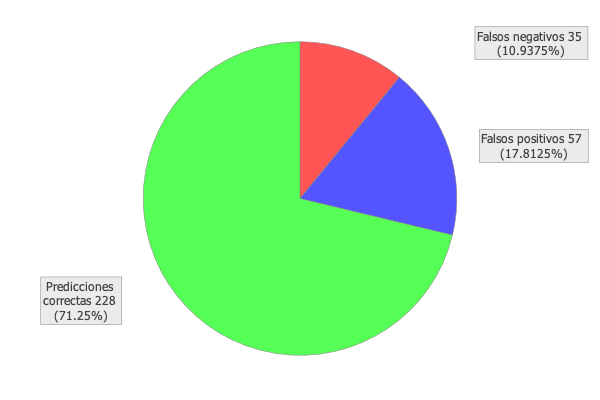

In [13]:
(def tests
    (-> (fn [p r] (cond
            (= p r) :true
            (= p "buena calidad") :falsePos
            :else :falseNeg))
        (map (pmap #(dt/predict tree %) testingData) (map #(:quality %) testingData))
        frequencies))

(def title-names
    {:true "Predicciones correctas"
     :falsePos "Falsos positivos"
     :falseNeg "Falsos negativos"})

(def titles
    (->> tests
        (into '())
        (map (partial replace title-names))
        (map #(str (first %) " " (second %) " (" (* 100.0 (/ (second %) (count testingData))) "%)"))))

(def values
    (->> tests
        (into '())
        (map second)))

(-> (pie-chart titles values)
    (.createBufferedImage  600 400))

---